# exc 1a

Creating a dataset for:

$$
f(x) = \frac{1}{1+25x^2}, \quad x \in [-1,1]
$$

In [110]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
import seaborn as sns 


In [3]:
#n = 100
#x = np.linspace(-1,1, n) #x within interval [-1,1]
#denominator = 1+(25*x**2)
#defining y and adding noise as a normal distrubution with mean 0 and std 1
#y = 1/denominator + np.random.normal(0, 1, x.shape) 


In [4]:
#Perform a standard ordinary least square regression analysis
#Import polynimial features from func_list and OLS_parameters
from func_list import polynomial_features, OLS_parameters#, mse_poly_plot

In [5]:
#The task says to use a polynomial higher than 15 so we have used 16 with intercept not included
#X_task1 = polynomial_features(x, p = 16, intercept = False) 

#checking that it works as it should
#print(X_task1) 

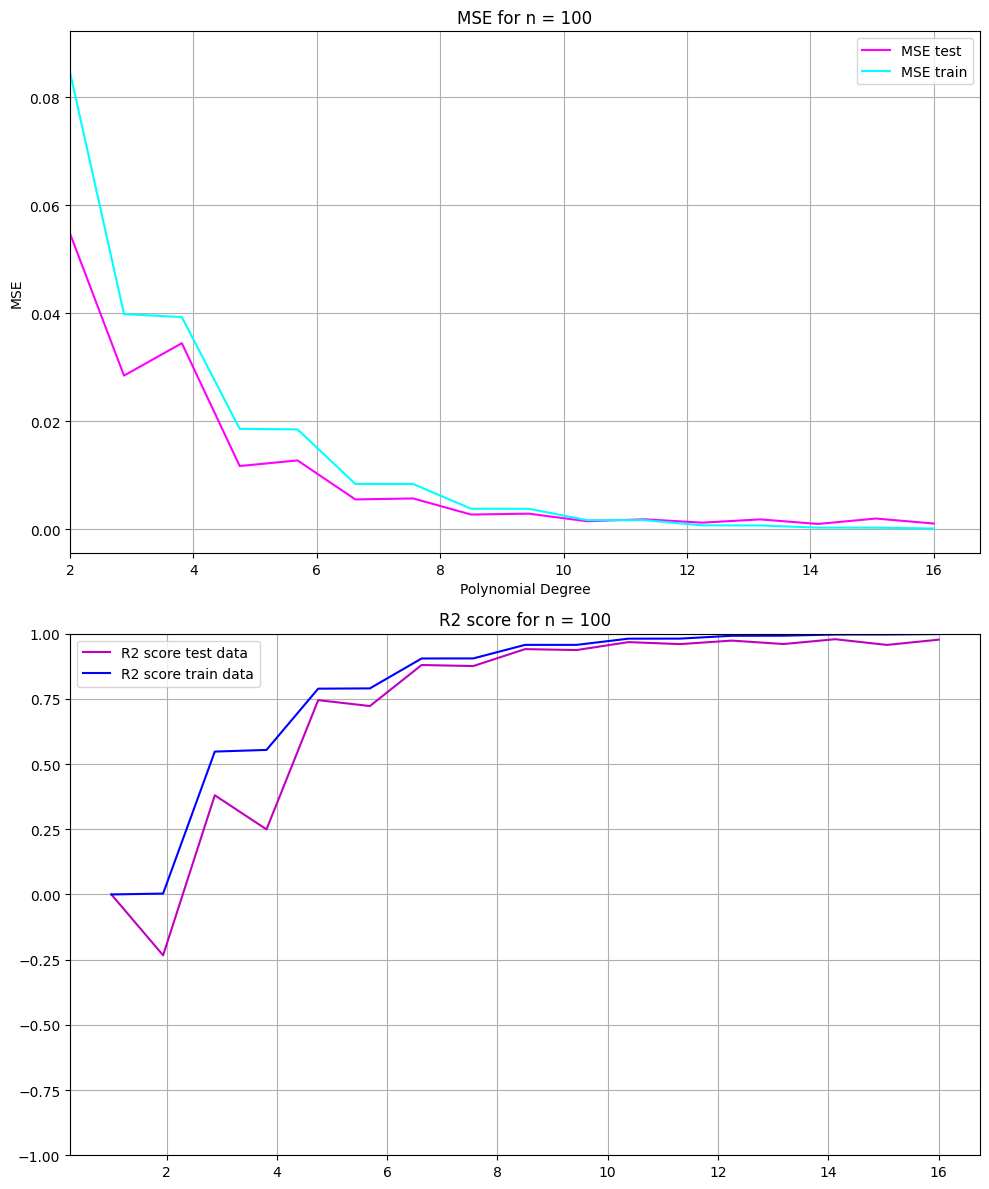

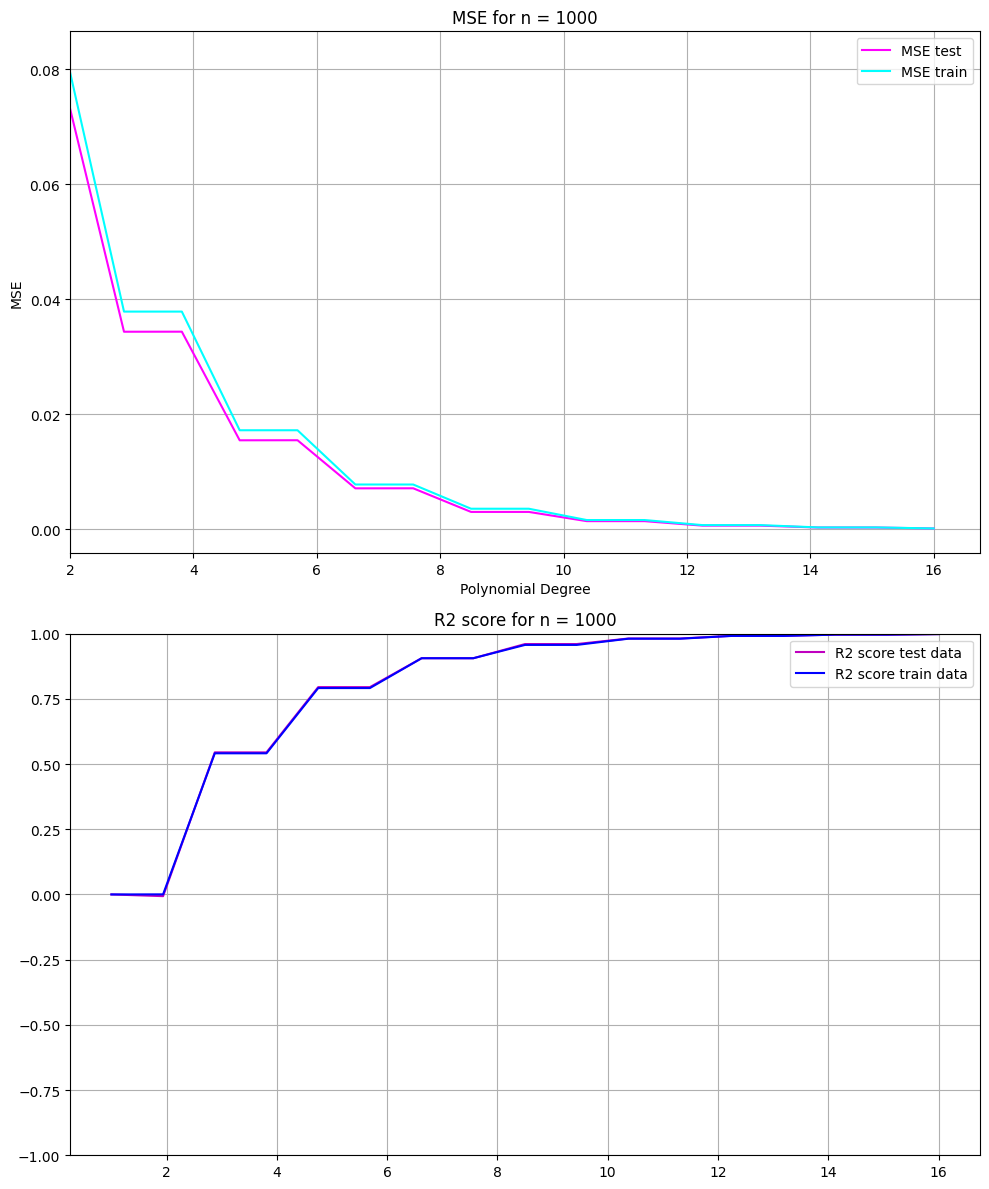

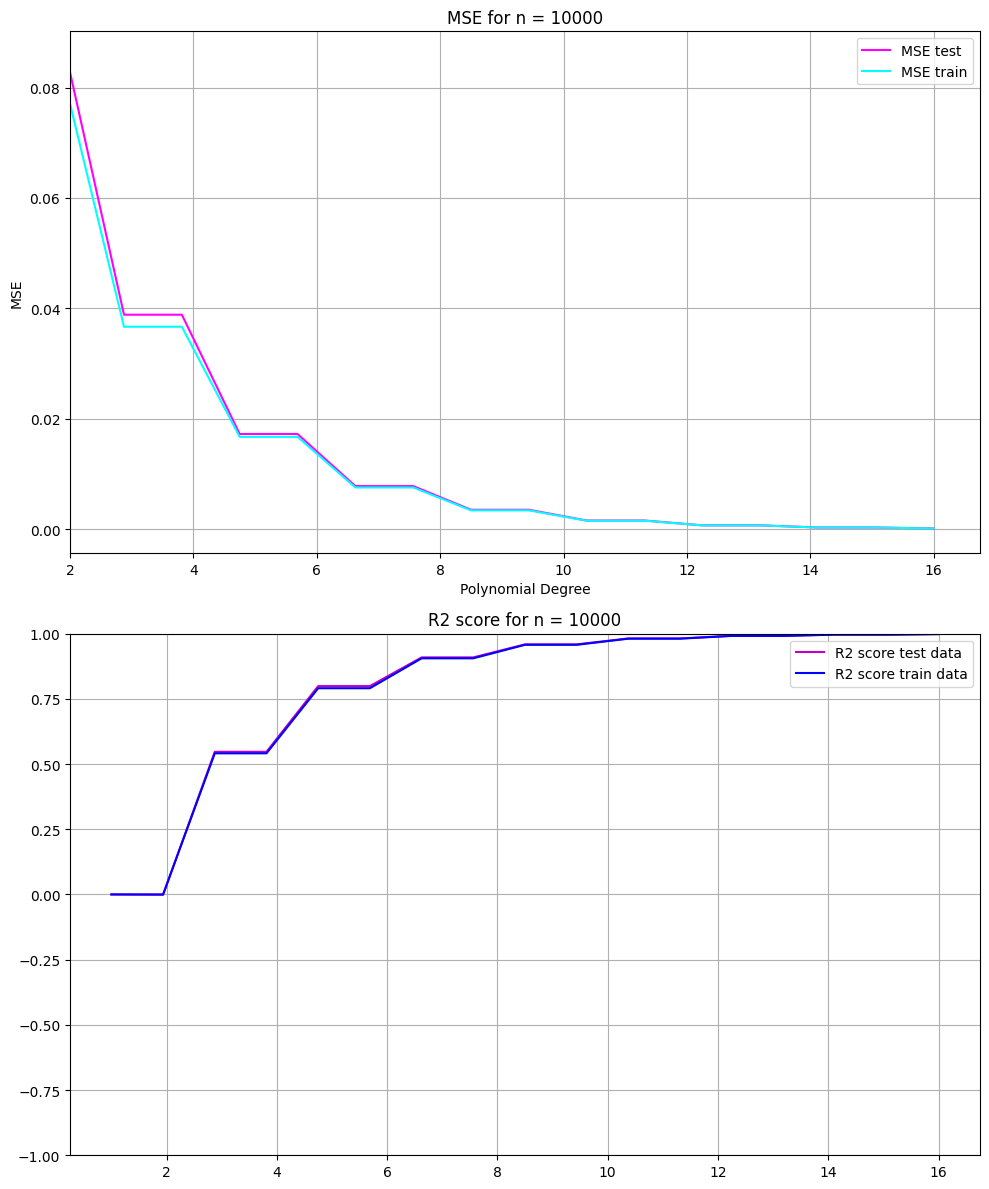

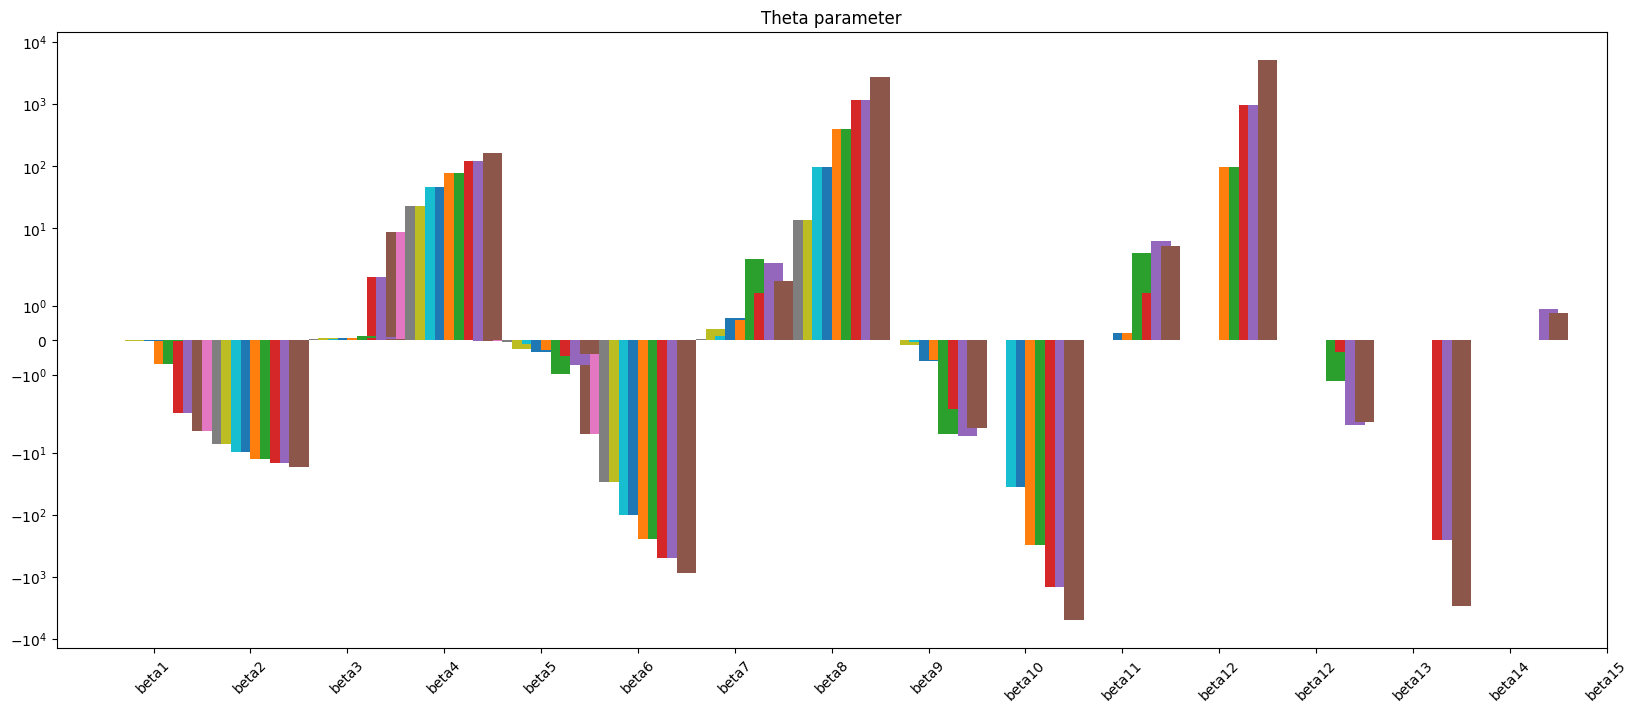

In [73]:
#Now that we have our design matrix, I will use the function mse_poly_plot
#explain the code later!!!!!!!

#MSE and changing the polynomial degree
def mse_poly_plot_OLS(degree, intercept=bool):
    np.random.seed(3155)
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        poly_deg = np.linspace(1,degree,degree+1)
        mse_train_list = np.zeros(degree+1)
        mse_test_list = np.zeros(degree+1)
        R2_test = np.zeros(degree+1)
        R2_train = np.zeros(degree+1)
        beta_matrix = np.zeros((degree+1, degree+1))

        #range polynomial degree
        for p in range(1, degree+1):
            X = polynomial_features(x,p,intercept=intercept)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
            scaler = StandardScaler(with_std = False)
            scaler.fit(X_train)
            X_train_s = scaler.transform(X_train)
            X_test_s = scaler.transform(X_test)
            y_mean = np.mean(y_train)
            y_scaled_train = (y_train - y_mean)

            beta = OLS_parameters(X_train_s,y_scaled_train)
        
            y_pred_train = (X_train_s @ beta + y_mean)
            y_pred_test = (X_test_s @ beta + y_mean)

            mse_train_list[p] = MSE(y_train,y_pred_train)
            mse_test_list[p] = MSE(y_test, y_pred_test)

            R2_test[p] = r2_score(y_test, y_pred_test)
            #print(f'The R2 score is: {R2_test} for degree: {p}')
            R2_train[p] = r2_score(y_train, y_pred_train)

            for i in range(len(beta)):
                beta_matrix[p-1,i] = beta[i]
            #print(beta_matrix)
    

        fig,ax = plt.subplots(2, figsize=(10,12))
        ax[0].plot(poly_deg, mse_test_list, label = "MSE test", color = "magenta")
        ax[0].plot(poly_deg, mse_train_list, label = "MSE train", color = "cyan")
        ax[0].set_title(f'MSE for n = {n}')
        ax[0].set_ylabel("MSE")
        ax[0].set_xlabel("Polynomial Degree")
        ax[1].plot(poly_deg, R2_test, label = 'R2 score test data', color = 'm')
        ax[1].plot(poly_deg, R2_train, label = 'R2 score train data', color = 'b')
        ax[1].set_ylim(-1,1)
        ax[1].set_title(f'R2 score for n = {n}')
        ax[0].set_xlim(2)
        ax[0].grid(True)
        ax[0].legend()
        ax[1].legend()
        ax[1].grid(True)
        plt.tight_layout()
        plt.show()

    num_rows, num_columns = beta_matrix.shape
    names = ['beta1', 'beta2', 'beta3', 'beta4', 'beta5', 'beta6', 'beta7', 'beta8', 'beta9', 'beta10', 'beta11', 'beta12', 'beta12', 'beta13', 'beta14', 'beta15']
    bar_width = 0.1
    r = np.arange(num_columns)
    plt.figure(figsize=(20,8))
    for m in range(num_rows): 
        plt.bar(r + m * bar_width, beta_matrix[m, :degree+1], label = f'Row: {m+1}', width=0.2)
        plt.xticks(range(2,degree+2),names, rotation = 45)
        plt.yscale('symlog')
        plt.title('Theta parameter')
        plt.xlim(1)

    return mse_test_list, mse_train_list

mse_test_list_t1,mse_train_lis_t2 = mse_poly_plot_OLS(degree=16, intercept=False)

In the above code we have used the optimization of OLS to find the parameter theta of a 
linear regression model that best describes/fits our data by minimizing the sum 
sum of the squared differences between the actual data points and the predicted values.

# Exercise 1B

In [168]:
from func_list import Ridge_parameters

#MSE and changing lambda
def poly_plot_ridge(intercept=False, annotate = False):
    nlambdas = 10
    lambdas = np.logspace(-5,1,nlambdas)
    degree = 10
    poly_deg = np.arange(1,degree,degree+1) #c 
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        mse_train_list = np.zeros((degree, nlambdas,))
        mse_test_list = np.zeros((degree, nlambdas))
        R2_test = np.zeros((degree, nlambdas))
        R2_train = np.zeros((degree, nlambdas))
        #beta_matrix = np.zeros(((nlambdas+1, nlambdas)))

        #range polynomial degree
        for p in range(1, degree+1):
            for j, lmb in enumerate(lambdas):
                X = polynomial_features(x,p,intercept=intercept)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                scaler = StandardScaler(with_std = True) #scale with standard deviation this time
                scaler.fit(X_train)
                X_train_s = scaler.transform(X_train)
                X_test_s = scaler.transform(X_test)
                y_mean = np.mean(y_train)
                #y_std = np.std(y_train)
                y_scaled_train = (y_train - y_mean) #centered, not scaled

                beta = Ridge_parameters(X_train_s, y_scaled_train, lmb)
    
                y_pred_train = (X_train_s @ beta + y_mean)
                y_pred_test = (X_test_s @ beta + y_mean)

                mse_train_list[p-1,j] = MSE(y_train,y_pred_train)
                mse_test_list[p-1,j] = MSE(y_test, y_pred_test)

                R2_test[p-1,j] = r2_score(y_test, y_pred_test)
                R2_train[p-1,j] = r2_score(y_train, y_pred_train)
        
        fig,axes = plt.subplots(2,2, figsize=(16,16)) #c 
        titles = ['MSE train', 'MSE test', '$R^2$ train', '$R^2$ test']
        data = [mse_train_list, mse_test_list, R2_train, R2_test]
        for ax, title,plotting in zip(axes.ravel(), titles, data):
            sns.heatmap(plotting, ax=ax, xticklabels=[f'{lmb:.1e}' for lmb in lambdas], yticklabels=np.arange(1,degree+1), cmap='PiYG', annot = annotate, cbar = True)
            ax.set_title(f'{title} for n: {n}')
            ax.set_ylabel('Polynomial Degree')
            ax.set_xlabel(f'$\lambda$')
            ax.invert_yaxis()
            ax.invert_xaxis()
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    plt.show()
    return mse_test_list, mse_train_list

    #return mse_test_list, mse_train_list

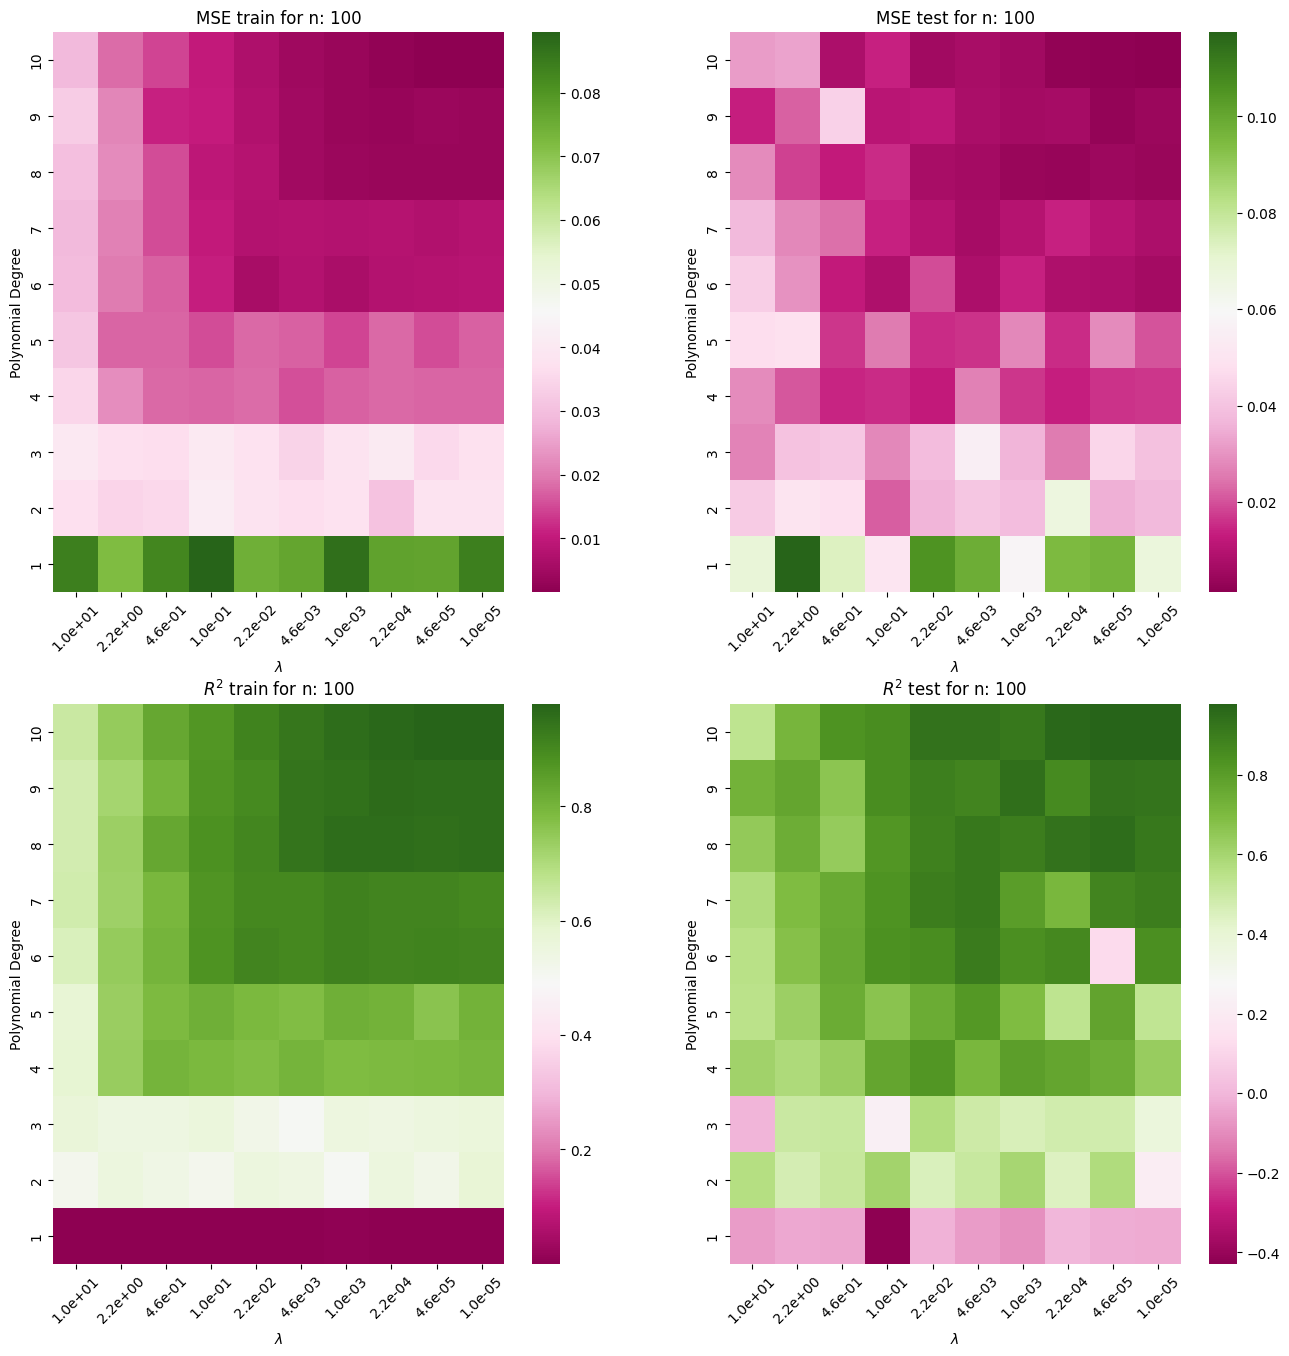

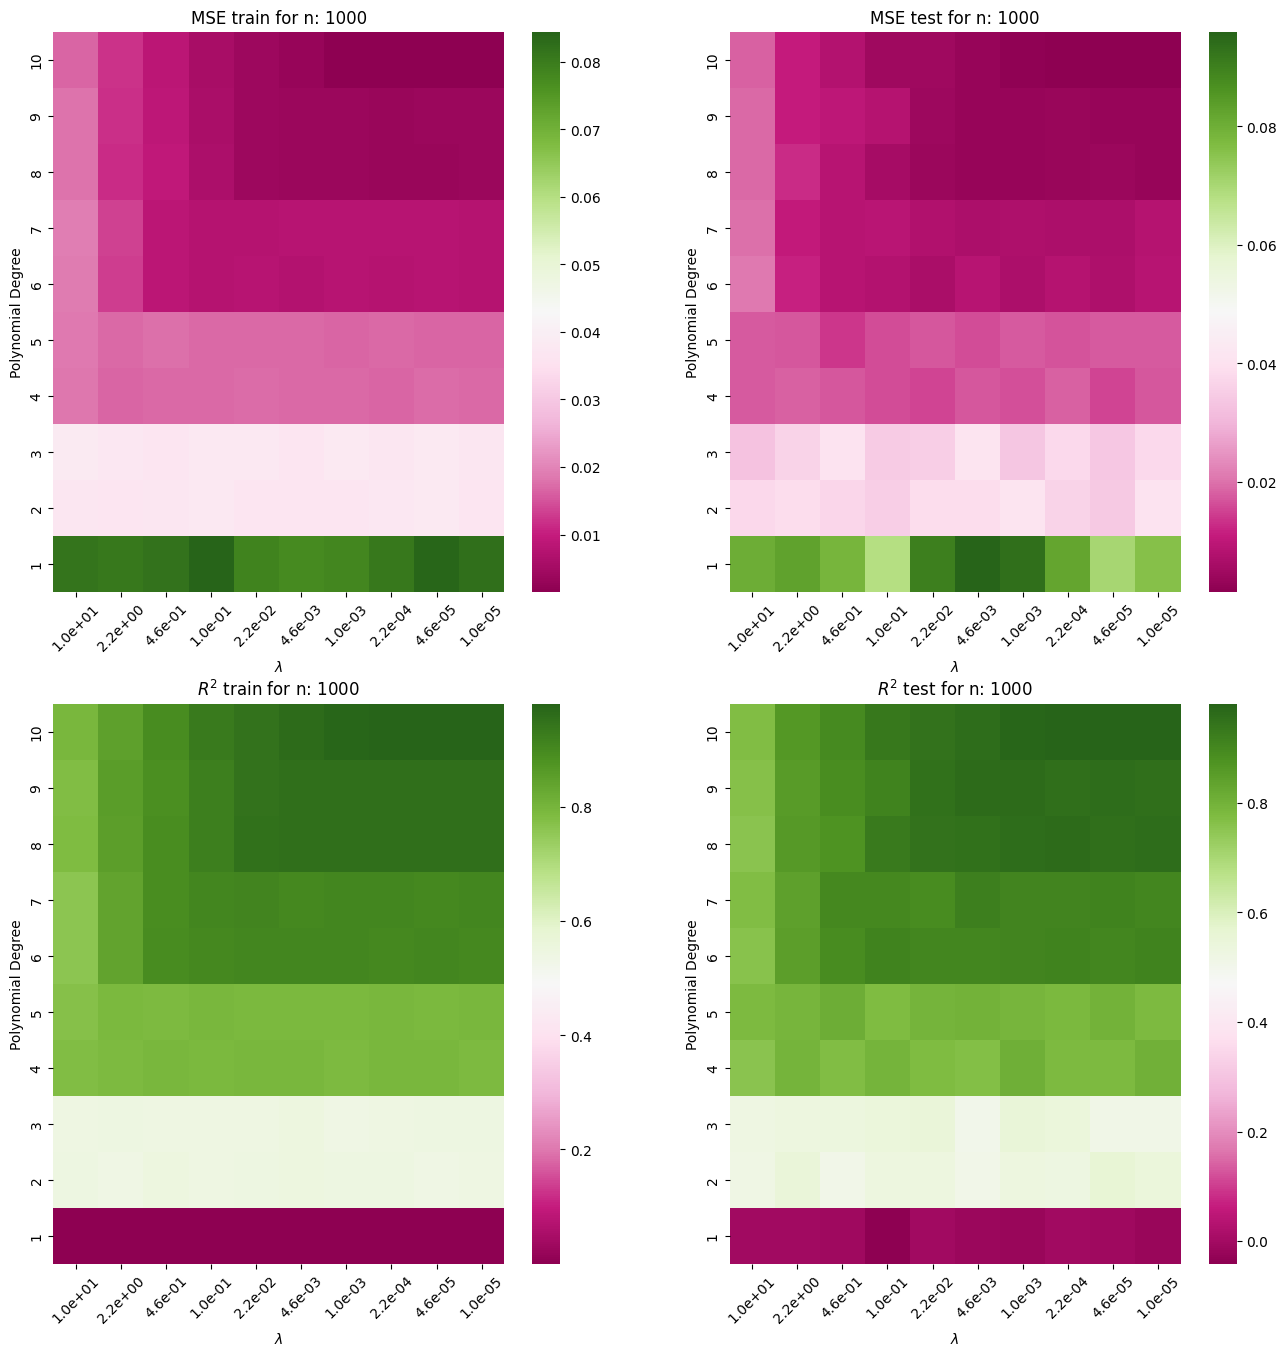

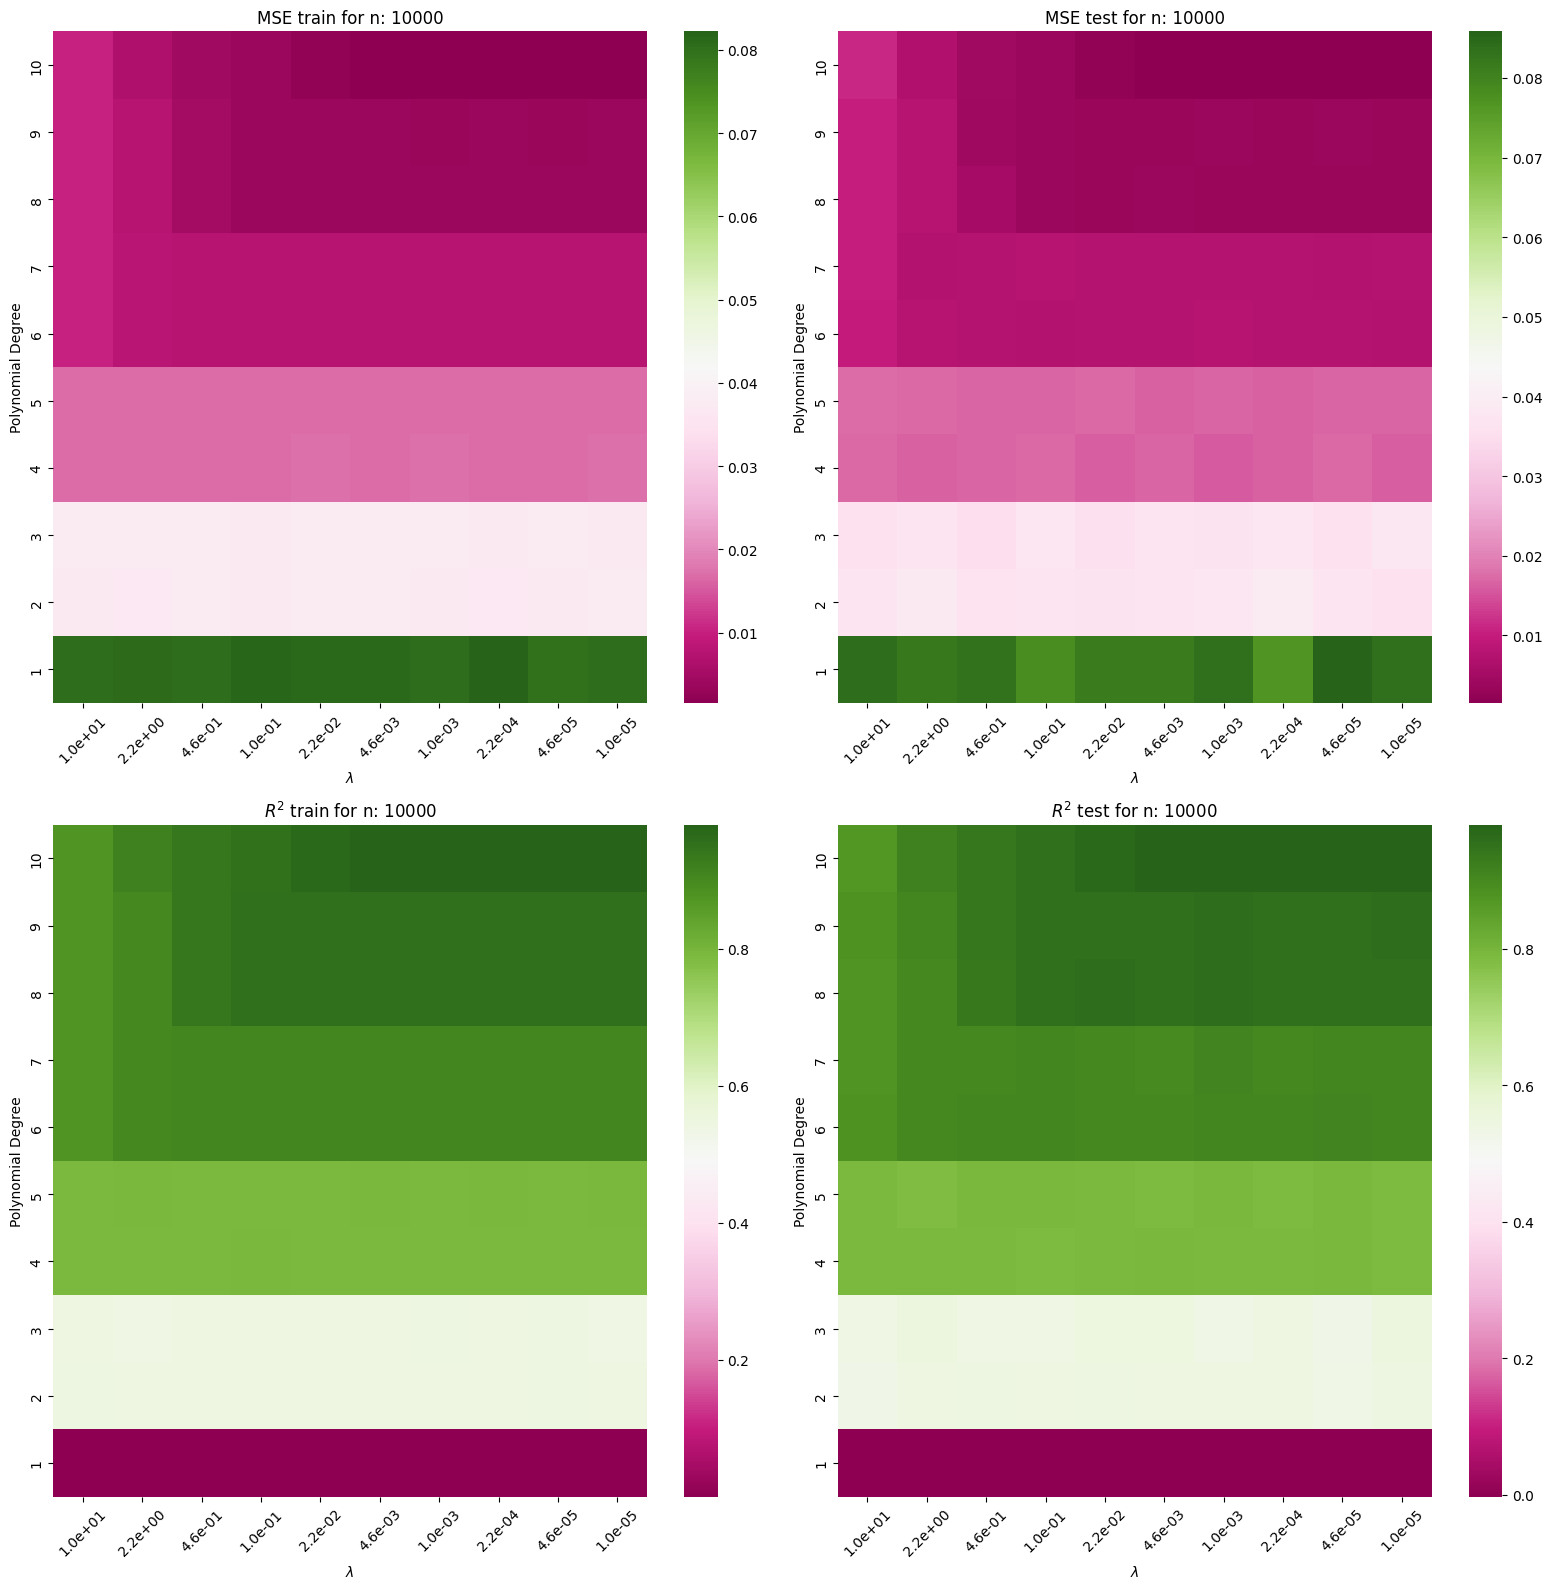

In [169]:
mse_test_list_r, mse_train_list_r = poly_plot_ridge()

# exercise 1C

In [ ]:
#create dataset 
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient(x,y,n_feat):
    #define variables 
    num_iters = 1000
    eta = 0.1
    lam = 0.1 #fixed lambda for the Ridge
    n = 100
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge

    for t in range(num_iters):
        grad_OLSn = (2.0/n)*x.T @ (x @ theta_gdOLSn-y)
        theta_gdOLSn -= grad_OLSn * eta

    tol = 1e-10
    for t in range(num_iters):
    # Compute gradients for Ridge
        grad_Ridgen = (2.0/n)*x.T @ (x @ (theta_gdRidgen)-y)+2*lam*theta_gdRidgen
        # Update parameters theta
        theta_gdRidgen -= grad_Ridgen * eta 
    
        if (np.linalg.norm(grad_Ridgen*eta) < tol):
            print('loop broken at ' + str(t))
            break


    print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    print("Gradient Descent Ridge coefficients:", theta_gdRidgen)